# Classification Modeling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Data Import

In [4]:
df = pd.read_csv('./data/iris.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = df.drop(columns=['species'])
y = df['species']

In [7]:
scores = []

for size in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42, stratify=y)
    
    logr = LogisticRegression()
    rf = RandomForestClassifier(random_state=42)
    
    logr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    
    l_acc = logr.score(X_test, y_test)
    
    r_acc = rf.score(X_test, y_test)

    scores.append({
        'test_size': size,
        'Logistic Regression': l_acc,
        'Random Forest': r_acc
    })

In [8]:
scores_df = pd.DataFrame(scores)

In [9]:
scores_df.sort_values(by='Logistic Regression', ascending=False)

,test_size,Logistic Regression,Random Forest
0,0.20,0.966667,0.900000
7,0.27,0.951220,0.902439
6,0.26,0.950000,0.925000
19,0.39,0.949153,0.932203
18,0.38,0.948276,0.931034
5,0.25,0.947368,0.921053
17,0.37,0.946429,0.928571
4,0.24,0.945946,0.891892
16,0.36,0.945455,0.927273
15,0.35,0.943396,0.905660


In [10]:
scores_df.sort_values(by='Random Forest', ascending=False)

,test_size,Logistic Regression,Random Forest
14,0.34,0.942308,0.942308
1,0.21,0.937500,0.937500
19,0.39,0.949153,0.932203
18,0.38,0.948276,0.931034
17,0.37,0.946429,0.928571
16,0.36,0.945455,0.927273
6,0.26,0.950000,0.925000
5,0.25,0.947368,0.921053
11,0.31,0.936170,0.914894
3,0.23,0.942857,0.914286


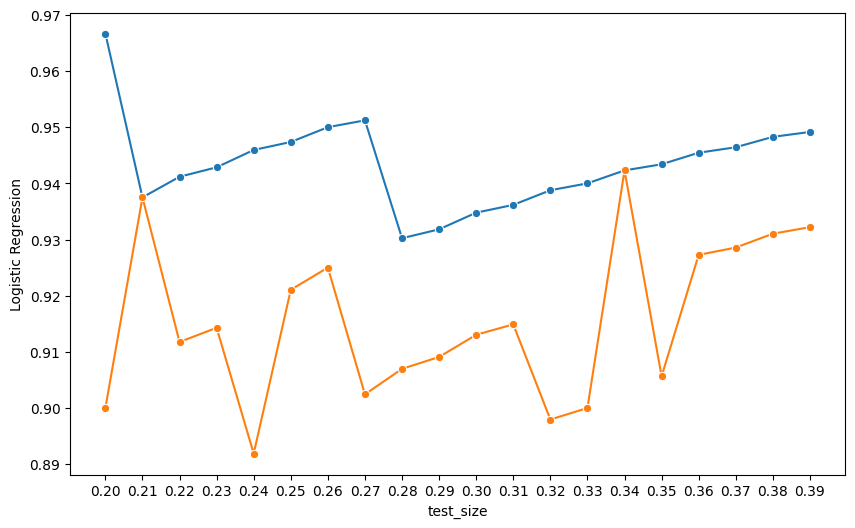

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=scores_df, y='Logistic Regression', x='test_size', marker='o')
sns.lineplot(data=scores_df, y='Random Forest', x='test_size', marker='o')
plt.xticks(np.arange(0.2, 0.4, 0.01));

## KNN

In [12]:
scores = []

for size in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42, stratify=y)
    
    for k in np.arange(3, 31, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        k_acc = knn.score(X_test, y_test)
        scores.append({
            'test_size': size,
            'Score': k_acc,
            'K': k
        })

In [13]:
scores_df = pd.DataFrame(scores)

In [14]:
scores_df.sort_values(by='Score', ascending=False)

,test_size,Score,K
0,0.20,1.000000,3
3,0.20,1.000000,9
1,0.20,1.000000,5
190,0.33,0.980000,19
191,0.33,0.980000,21
...,...,...,...
26,0.21,0.906250,27
209,0.34,0.903846,29
208,0.34,0.903846,27
237,0.36,0.890909,29


## Chosen Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
knn_preds = knn.predict(X_test)

In [19]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Pickling

In [20]:
import pickle

In [21]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(knn, file)

In [22]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


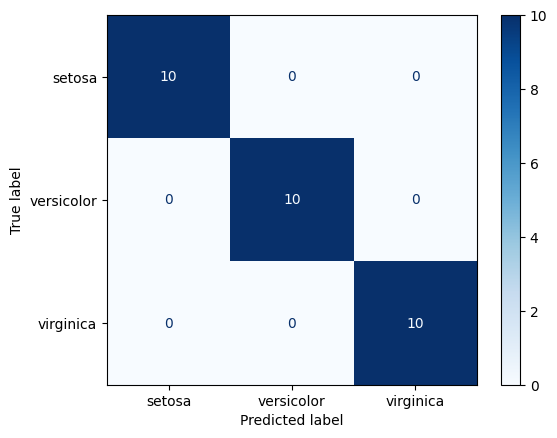

In [24]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.savefig('./images/knn_conf.png')